# Import Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
pd.set_option('display.max_columns', None)

# Loading Data

In [2]:
Train=pd.read_csv("Train.csv")
Train

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score
0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win
1,2016-09-14,1,12.0,ID_T7H1XN5Z,Andromeda,Antennae,Draw
2,2016-12-12,1,13.0,ID_O1P9FGN4,Andromeda,Butterfly,Away win
3,2017-01-25,1,14.0,ID_TR5M4KQV,Andromeda,Cigar,Away win
4,2016-08-24,1,15.0,ID_EOIECRE2,Andromeda,Circinus,Home Win
...,...,...,...,...,...,...,...
407,2016-08-28,1,59.0,ID_PREVA6HZ,Sculptor,Medusa Merger,Away win
408,2017-02-19,1,151.0,ID_9DJ219JY,Medusa Merger,Sculptor,Home Win
409,2016-10-23,1,154.0,ID_A1PN23J6,Medusa Merger,Sombrero,Home Win
410,2017-08-16,1,171.0,ID_XFQO60PZ,Milky Way,Sculptor,Draw


In [3]:
Train.duplicated().sum()

0

In [4]:
Test=pd.read_csv("Test.csv")
Test

,Date,Season,Match_ID,Game_ID,Home Team,Away Team
0,2018-12-08,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7
1,2018-09-11,3,18.0,ID_H49BIKG7,Cosmos Redshift 7,Tadpole
2,2018-09-25,3,32.0,ID_PO6SP4VA,Cosmos Redshift 7,Medusa Merger
3,2018-10-02,3,40.0,ID_MZRCNBAQ,Cartwheel,Cosmos Redshift 7
4,2018-12-20,3,123.0,ID_CV9VOLIU,Cosmos Redshift 7,Needle
...,...,...,...,...,...,...
229,2018-12-08,3,300.0,ID_QKQ00O16,Malin 1,Needle
230,2018-12-11,3,300.0,ID_172V2IXW,Tadpole,Needle
231,2018-12-22,3,300.0,ID_2ZK5TE39,Circinus,Malin 1
232,2019-05-07,3,300.0,ID_IS54QGW9,Needle,Andromeda


In [5]:
Test.duplicated().sum()

0

In [6]:
Train_game=pd.read_csv("train_game_statistics.csv")
Train_game

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571572,ID_00EFNL7L,Player_30LIPYOT,3454.0,15.3,21.3,Milky Way,Air challenges won,2nd half,1,Masashi,Butterfly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.20,97.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1571573,ID_00EFNL7L,Player_3B44A2GJ,3455.0,88.6,48.7,Butterfly,Positional attacks,2nd half,1,Dante,Milky Way,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.22,97.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1571574,ID_00EFNL7L,Player_3B44A2GJ,3456.0,88.6,48.7,Butterfly,Fouls,2nd half,1,Dante,Milky Way,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.22,97.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1571575,ID_00EFNL7L,Player_DICH31J8,3457.0,18.1,19.7,Milky Way,Inaccurate passes,2nd half,1,Masashi,Butterfly,0.0,0.0,0.0,0.0,0.0,1.0,1.0,97.77,98.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [7]:
Train.describe()

,Season,Match_ID
count,412.000000,412.000000
mean,1.497573,109.536408
std,0.500602,63.273255
min,1.000000,1.000000
25%,1.000000,54.750000
50%,1.000000,110.000000
75%,2.000000,165.000000
max,2.000000,224.000000


In [8]:
Test.describe()

,Season,Match_ID
count,234.0,234.000000
mean,3.0,126.581197
std,0.0,81.669568
min,3.0,2.000000
25%,3.0,60.250000
50%,3.0,119.500000
75%,3.0,179.750000
max,3.0,300.000000


In [9]:
Train.shape, Test.shape, Train_game.shape

((412, 7), (234, 6), (1571577, 28))

In [10]:
Train_game.isnull().sum()

Game_ID                    0
Player_ID                  0
id                         0
X                          0
Y                          0
Team                       0
Action                     0
Half                       0
Season                     0
Manager                    0
Opposition_Team            0
Shots                      0
SoT                        0
Goals_scored               0
Goals_conceded             0
Accurate passes            0
Inaccurate passes          0
Passes                     0
Start_minutes              0
End_minutes                0
next_player          1571577
next_action          1571577
next_x               1571577
next_y               1571577
event_id             1571577
next_team            1571577
next_event_id        1571577
xt_value             1571577
dtype: int64

In [11]:
#Dropping columns
columns_to_drop = ["next_player", "next_action", "next_x","next_y","event_id","next_team","next_event_id","xt_value"]

Train_game.drop(columns=columns_to_drop, inplace=True)


In [12]:
Train_game

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.03,0.37
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.37
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.38
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.40
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.07,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571572,ID_00EFNL7L,Player_30LIPYOT,3454.0,15.3,21.3,Milky Way,Air challenges won,2nd half,1,Masashi,Butterfly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.20,97.53
1571573,ID_00EFNL7L,Player_3B44A2GJ,3455.0,88.6,48.7,Butterfly,Positional attacks,2nd half,1,Dante,Milky Way,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.22,97.55
1571574,ID_00EFNL7L,Player_3B44A2GJ,3456.0,88.6,48.7,Butterfly,Fouls,2nd half,1,Dante,Milky Way,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.22,97.55
1571575,ID_00EFNL7L,Player_DICH31J8,3457.0,18.1,19.7,Milky Way,Inaccurate passes,2nd half,1,Masashi,Butterfly,0.0,0.0,0.0,0.0,0.0,1.0,1.0,97.77,98.10


In [13]:
#Merging tables
merged_train = pd.merge(Train, Train_game, on='Game_ID')


In [14]:
merged_train.duplicated().sum()

3743

In [15]:
# Use the duplicated() method to create a boolean mask for duplicated rows
duplicated_mask = Train_game.duplicated()

# Filter the DataFrame based on the mask to show the duplicated rows
duplicated_rows = Train_game[duplicated_mask]

print("Duplicated Rows:")
print(duplicated_rows)

Duplicated Rows:
            Game_ID        Player_ID      id      X     Y       Team  \
862619  ID_HPYKEW7R  Player_LE1455TI     1.0   52.3  34.1   Antennae   
862621  ID_HPYKEW7R  Player_LE1455TI     2.0   52.3  34.1   Antennae   
862623  ID_HPYKEW7R  Player_FUZ0F8HW     3.0   33.1  31.2   Antennae   
862625  ID_HPYKEW7R  Player_FUZ0F8HW     4.0   33.1  31.2   Antennae   
862627  ID_HPYKEW7R  Player_Q3PXFKA5     5.0   19.8  15.8  Andromeda   
...             ...              ...     ...    ...   ...        ...   
870095  ID_HPYKEW7R  Player_QITLSMKC  3741.0    2.2  32.7  Andromeda   
870097  ID_HPYKEW7R  Player_QITLSMKC  3742.0    2.2  32.7  Andromeda   
870099  ID_HPYKEW7R  Player_GAQ7J3UU  3743.0  102.8  35.3   Antennae   
870101  ID_HPYKEW7R  Player_GAQ7J3UU  3744.0  102.0  36.9   Antennae   
870103  ID_HPYKEW7R  Player_GAQ7J3UU  3745.0  102.0  36.9   Antennae   

                    Action      Half  Season Manager Opposition_Team  Shots  \
862619  Positional attacks  1st half   

In [16]:
print(merged_train['id'].min(), '\n')
print(merged_train['id'].max())

1.0 

4698.0


In [17]:
merged_train.columns

Index(['Date', 'Season_x', 'Match_ID', 'Game_ID', 'Home Team', 'Away Team',
       'Score', 'Player_ID', 'id', 'X', 'Y', 'Team', 'Action', 'Half',
       'Season_y', 'Manager', 'Opposition_Team', 'Shots', 'SoT',
       'Goals_scored', 'Goals_conceded', 'Accurate passes',
       'Inaccurate passes', 'Passes', 'Start_minutes', 'End_minutes'],
      dtype='object')

In [18]:
merged_train.describe()

,Season_x,Match_ID,id,X,Y,Season_y,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes
count,1.571577e+06,1.571577e+06,1.571577e+06,1.571577e+06,1.571577e+06,1.571577e+06,1.571577e+06,1.571577e+06,1.571577e+06,1.571577e+06,1.571577e+06,1.571577e+06,1.571577e+06,1.571577e+06,1.571577e+06
mean,1.486434e+00,1.086778e+02,1.918854e+03,5.256539e+01,3.375073e+01,1.486434e+00,5.479846e-03,1.478769e-03,5.682191e-04,5.682191e-04,1.937958e-01,4.583167e-02,2.396275e-01,4.812961e+01,4.846361e+01
std,4.998161e-01,6.309864e+01,1.123462e+03,2.689841e+01,2.029046e+01,4.998161e-01,7.382290e-02,3.842634e-02,2.383058e-02,2.383058e-02,3.952709e-01,2.091200e-01,4.268562e-01,2.869373e+01,2.869393e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.700000e-01
25%,1.000000e+00,5.300000e+01,9.530000e+02,3.180000e+01,1.610000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.285000e+01,2.318000e+01
50%,1.000000e+00,1.090000e+02,1.905000e+03,5.280000e+01,3.380000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.783000e+01,4.817000e+01
75%,2.000000e+00,1.630000e+02,2.856000e+03,7.360000e+01,5.140000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.278000e+01,7.312000e+01
max,2.000000e+00,2.240000e+02,4.698000e+03,1.050000e+02,6.800000e+01,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.105200e+02,1.108500e+02


In [19]:
merged_train.shape

(1571577, 26)

In [20]:
merged_train.dtypes

Date                  object
Season_x               int64
Match_ID             float64
Game_ID               object
Home Team             object
Away Team             object
Score                 object
Player_ID             object
id                   float64
X                    float64
Y                    float64
Team                  object
Action                object
Half                  object
Season_y               int64
Manager               object
Opposition_Team       object
Shots                float64
SoT                  float64
Goals_scored         float64
Goals_conceded       float64
Accurate passes      float64
Inaccurate passes    float64
Passes               float64
Start_minutes        float64
End_minutes          float64
dtype: object

In [21]:
merged_train.Goals_conceded.nunique()

2

In [22]:
merged_train.Goals_scored.nunique()

2

#### How many games were played in train seasons and test seasons?

In [23]:
merged_train.Game_ID.nunique()

412

In [24]:
Test.Game_ID.nunique()

234

#### How many teams were away and home?

In [25]:
Train["Home Team"].nunique()

19

In [26]:
Train["Away Team"].nunique()

19

In [27]:
merged_train.to_csv('cleaned_df.csv')
print('The CSV file has been exported successfully.')

The CSV file has been exported successfully.


# Feature Engineering

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
merged_train.drop(columns= ["Manager","Date", "Goals_scored", "Goals_conceded", "Action"],axis=1,inplace=True)

In [30]:
label_encoder = LabelEncoder()  

for col in merged_train.columns:     
    merged_train[col] = label_encoder.fit_transform(merged_train[col])  
    merged_train

In [31]:
merged_train

,Season_x,Match_ID,Game_ID,Home Team,Away Team,Score,Player_ID,id,X,Y,Team,Half,Season_y,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes
0,0,0,218,1,0,0,401,0,525,343,0,0,0,1,0,0,0,0,0,11,21
1,0,0,218,1,0,0,401,1,525,343,0,0,0,1,0,0,1,0,1,11,21
2,0,0,218,1,0,0,446,2,395,342,0,0,0,1,0,0,0,0,0,12,22
3,0,0,218,1,0,0,446,3,433,342,0,0,0,1,0,0,0,1,1,14,24
4,0,0,218,1,0,0,446,4,433,342,0,0,0,1,0,0,0,0,0,14,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571572,1,104,351,14,13,2,408,3548,557,419,13,1,1,14,0,0,0,0,0,5932,5942
1571573,1,104,351,14,13,2,408,3549,570,434,13,1,1,14,0,0,0,0,0,5933,5943
1571574,1,104,351,14,13,2,408,3550,570,434,13,1,1,14,0,0,0,1,1,5933,5943
1571575,1,104,351,14,13,2,289,3551,311,645,14,1,1,13,0,0,0,0,0,5936,5946


<Axes: >

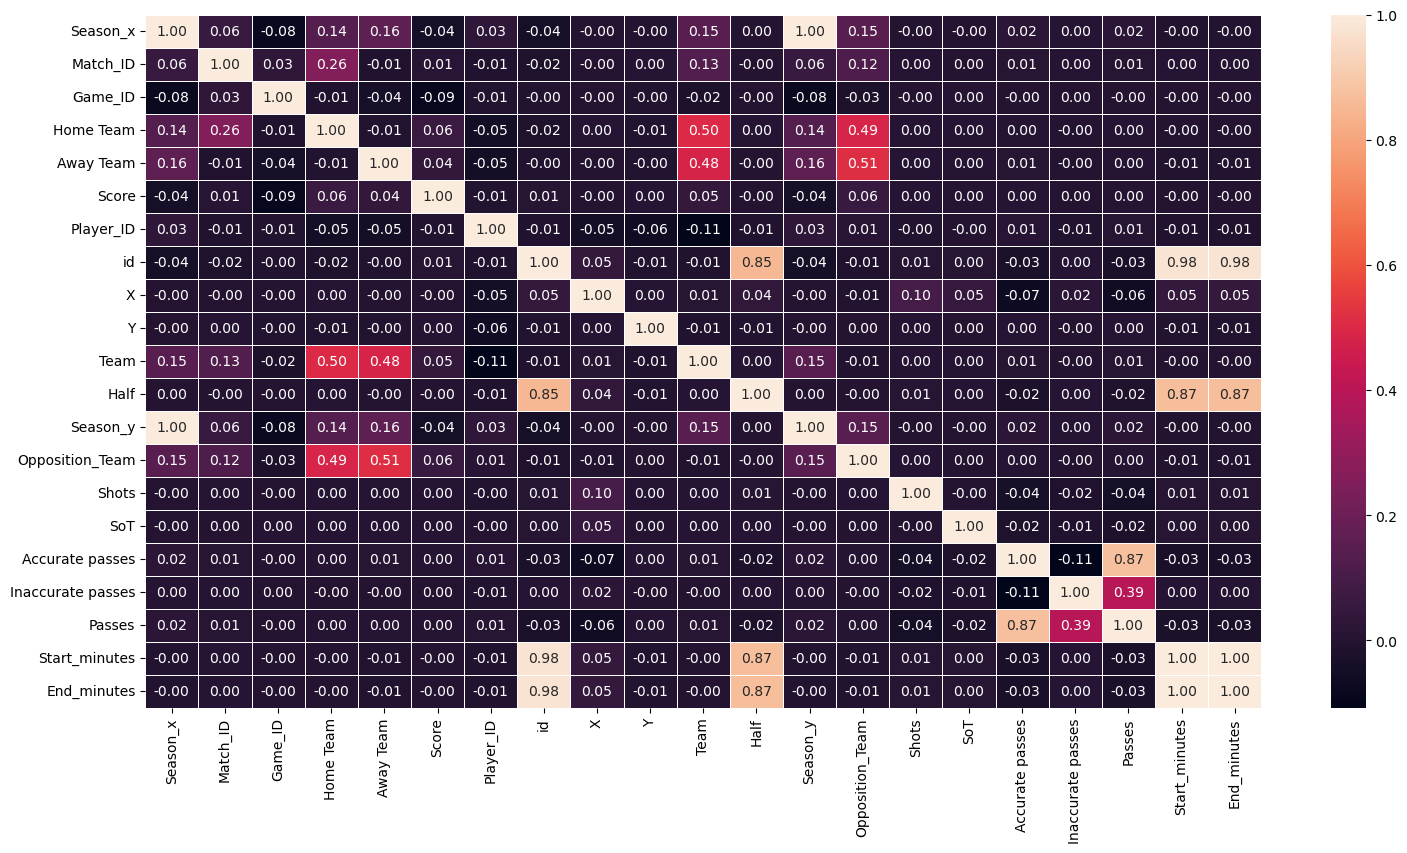

In [32]:
corr_matrix = merged_train.corr()

plt.figure(figsize = (18, 9))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths= 0.5)

In [33]:
merged_train.skew()

Season_x              0.054283
Match_ID              0.019276
Game_ID               0.003549
Home Team             0.085076
Away Team             0.083933
Score                -0.229422
Player_ID            -0.002469
id                    0.074862
X                    -0.005308
Y                     0.007510
Team                  0.079980
Half                 -0.007716
Season_y              0.054283
Opposition_Team       0.090053
Shots                13.397490
SoT                  25.946883
Accurate passes       1.549341
Inaccurate passes     4.343621
Passes                1.219956
Start_minutes         0.043011
End_minutes           0.043004
dtype: float64

In [34]:
merged_train.kurtosis()

Season_x              -1.997056
Match_ID              -1.188042
Game_ID               -1.204696
Home Team             -1.038243
Away Team             -1.037449
Score                 -1.456206
Player_ID             -1.146326
id                    -1.093032
X                     -0.917511
Y                     -1.216155
Team                  -1.026168
Half                  -1.999943
Season_y              -1.997056
Opposition_Team       -1.048259
Shots                177.492957
SoT                  671.241572
Accurate passes        0.400457
Inaccurate passes     16.867064
Passes                -0.511709
Start_minutes         -1.203455
End_minutes           -1.203437
dtype: float64

In [35]:
#merged_train.drop(columns=[''],axis=1)

# Feature Selection

In [36]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np

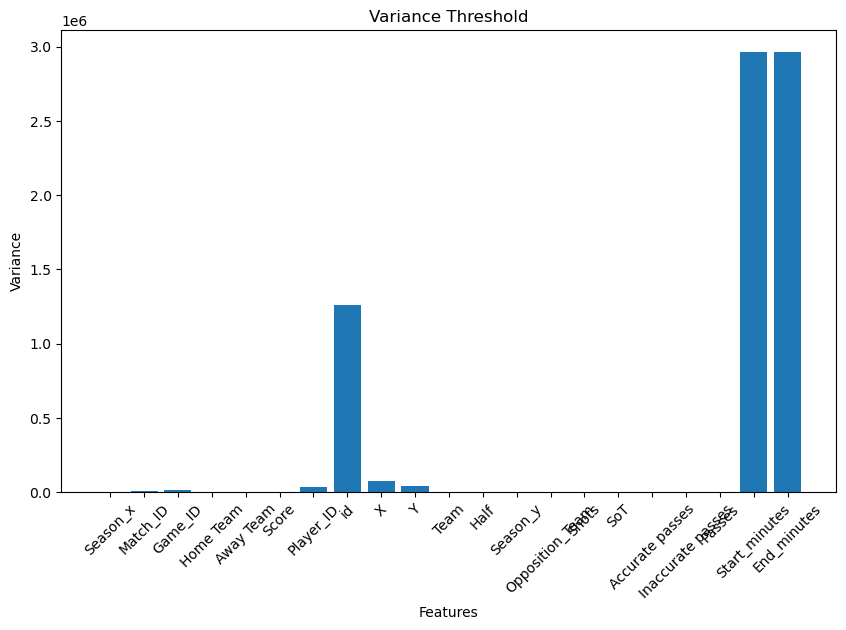

In [37]:

# Set the threshold for variance
threshold = 0.25

# Apply variance threshold to remove low-variance features
variance_selector = VarianceThreshold(threshold=threshold)
df_filtered = variance_selector.fit_transform(merged_train)

# Get the feature variances after filtering
feature_variances = np.var(merged_train, axis=0)

# Plot the variances of the features
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_variances)), feature_variances)
plt.xticks(range(len(feature_variances)), merged_train.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Variance Threshold')
plt.show()


In [38]:
#le = preprocessing.LabelEncoder()

In [ ]:
#merged_train = merged_train.drop(['Season_y','Passes','Inaccurate passes','Shots','Away Team','Home Team','Half','Opposition_Team','id','Player_ID'],axis=1)

In [55]:
merged_train = merged_train.drop(['Shots','Away Team','Home Team','Half','Opposition_Team'],axis=1)

# Modelling

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [59]:
X = merged_train.drop(["Score"], axis=1)
y = merged_train["Score"]

In [60]:
X

,Season_x,Match_ID,Game_ID,Player_ID,id,X,Y,Team,SoT,Accurate passes,Start_minutes,End_minutes
0,0,0,218,401,0,525,343,0,0,0,11,21
1,0,0,218,401,1,525,343,0,0,1,11,21
2,0,0,218,446,2,395,342,0,0,0,12,22
3,0,0,218,446,3,433,342,0,0,0,14,24
4,0,0,218,446,4,433,342,0,0,0,14,24
...,...,...,...,...,...,...,...,...,...,...,...,...
1571572,1,104,351,408,3548,557,419,13,0,0,5932,5942
1571573,1,104,351,408,3549,570,434,13,0,0,5933,5943
1571574,1,104,351,408,3550,570,434,13,0,0,5933,5943
1571575,1,104,351,289,3551,311,645,14,0,0,5936,5946


In [61]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Check for multicollinearity
print(vif)


           Features           VIF
0          Season_x  2.064425e+00
1          Match_ID  3.929292e+00
2           Game_ID  3.866605e+00
3         Player_ID  3.843321e+00
4                id  9.079916e+01
5                 X  4.690319e+00
6                 Y  3.651229e+00
7              Team  3.816409e+00
8               SoT  1.004516e+00
9   Accurate passes  1.240930e+00
10    Start_minutes  2.019483e+06
11      End_minutes  2.031405e+06


In [44]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform forward feature selection
selected_features = []
max_features = len(X_train.columns)  # Maximum number of features to select
for i in range(max_features):
    best_feature = None
    best_score = 0

    for feature in X_train.columns:
        if feature not in selected_features:
            selected_features.append(feature)
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]

            model = LogisticRegression()
            model.fit(X_train_selected, y_train)
            y_pred = model.predict(X_test_selected)
            score = accuracy_score(y_test, y_pred)

            if score > best_score:
                best_score = score
                best_feature = feature

            selected_features.remove(feature)

    if best_feature:
        selected_features.append(best_feature)
    else:
        break

print("Selected features:", selected_features)


/Users/da_m1_19/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/da_m1_19/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Selected features: ['Game_ID', 'Away Team', 'Home Team', 'Match_ID', 'SoT', 'Shots', 'Season_x', 'Half', 'Team', 'Opposition_Team', 'Accurate passes', 'Y', 'End_minutes', 'X', 'id', 'Player_ID', 'Start_minutes']


/Users/da_m1_19/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
import statsmodels.api as sm
def backward_regression(X, y,
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop  with p-value '.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

backward_regression(X_train, y_train)

Drop  with p-value 
Drop  with p-value 
Drop  with p-value 


['Season_x',
 'Match_ID',
 'Game_ID',
 'Home Team',
 'Away Team',
 'id',
 'X',
 'Y',
 'Team',
 'Half',
 'Opposition_Team',
 'Accurate passes',
 'Start_minutes',
 'End_minutes']

In [ ]:
import statsmodels.api as sm

def forward_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)

    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)

        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]

        best_pval = new_pval.min()

        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add {} with p-value {:.6f}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

#Assuming you have X_train and y_train as your dataframes
#Make sure to import pandas and statsmodels.api before running the code
result = forward_regression(X_train, y_train)
print("Selected features:", result)

In [47]:
X = merged_train.drop(["Score"], axis=1)
y = merged_train["Score"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)

Training set shape: (1100103, 17) (1100103,)


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_test)

In [65]:
clf = RandomForestClassifier()
clf.fit(X, y)

y_pred = clf.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_random)

Accuracy: 1.0


In [50]:
model_decision = DecisionTreeClassifier(random_state=42)  
model_decision.fit(X_train, y_train) 


y_pred = model_decision.predict(X_test)

accuracy_decision = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_decision)

Accuracy: 1.0


In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    130628
           1       1.00      1.00      1.00    151824
           2       1.00      1.00      1.00    189022

    accuracy                           1.00    471474
   macro avg       1.00      1.00      1.00    471474
weighted avg       1.00      1.00      1.00    471474

